In [1]:
# Import data into Python environment
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [2]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels
file = pd.read_csv('C:/Users/baps/Desktop/Capstone Projects/Python/Comcast_telecom_complaints_data.csv')
print(file.columns)
print(file.shape)

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')
(2224, 11)


In [3]:
# To convcert date_time_year to timeline form
file['Date_month_year'] = pd.to_datetime(file['Date_month_year'])
file['Month'] = file['Date_month_year'].dt.month
file['Day'] = file['Date_month_year'].dt.day

<AxesSubplot: xlabel='Day'>

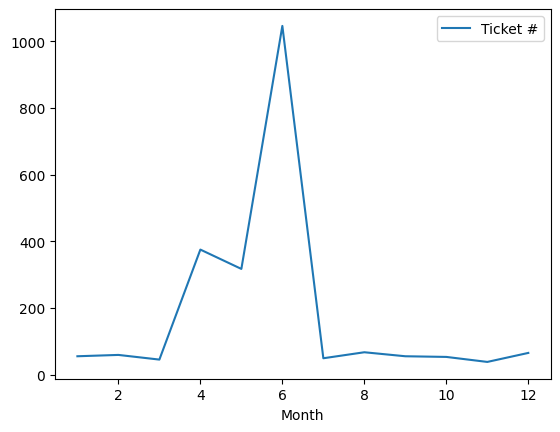

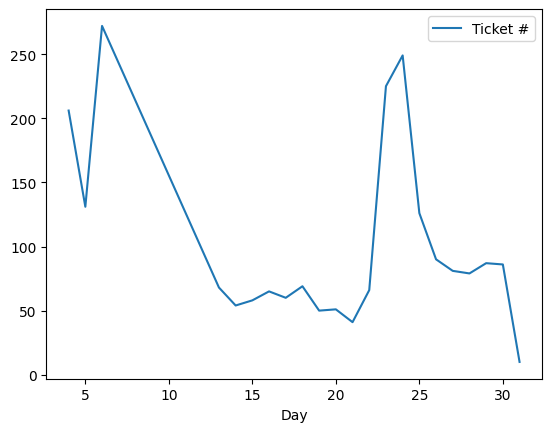

In [4]:
# For ploting Garphs
file[['Month', 'Ticket #']].groupby('Month').count().plot()
file[['Day', 'Ticket #']].groupby('Day').count().plot()


In [5]:

# Provide a table with the frequency of complaint types
file['Customer Complaint'].str.lower().value_counts()

comcast                                                            102
comcast data cap                                                    30
comcast internet                                                    29
comcast data caps                                                   21
comcast billing                                                     18
                                                                  ... 
monthly data caps                                                    1
comcast/xfinity poor service, fraudulent billing and collection      1
lost emails/billing                                                  1
improper billing and non resolution of issues                        1
comcast, ypsilanti mi internet speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

In [6]:
# Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized 
# as Open and Closed & Solved is to be categorized as Closed.
file['Status'].unique()
file['new_column'] = ['open' if x in ['Open', 'Pending'] else 'closed' for x in file['Status']]
print(file.head())


  Ticket #                                 Customer Complaint      Date  \
0   250635                      Comcast Cable Internet Speeds  22-04-15   
1   223441       Payment disappear - service got disconnected  04-08-15   
2   242732                                  Speed and Service  18-04-15   
3   277946  Comcast Imposed a New Usage Cap of 300GB that ...  05-07-15   
4   307175         Comcast not working and no service to boot  26-05-15   

  Date_month_year         Time        Received Via      City     State  \
0      2015-04-22   3:53:50 PM  Customer Care Call  Abingdon  Maryland   
1      2015-08-04  10:22:56 AM            Internet   Acworth   Georgia   
2      2015-04-18   9:55:47 AM            Internet   Acworth   Georgia   
3      2015-07-05  11:59:35 AM            Internet   Acworth   Georgia   
4      2015-05-26   1:25:26 PM            Internet   Acworth   Georgia   

   Zip code  Status Filing on Behalf of Someone  Month  Day new_column  
0     21009  Closed            

In [7]:
# Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
states = file[['State', 'new_column', 'Ticket #']].groupby(['State' , 'new_column']).count().unstack().fillna(0)
print(states)

                     Ticket #      
new_column             closed  open
State                              
Alabama                  17.0   9.0
Arizona                  14.0   6.0
Arkansas                  6.0   0.0
California              159.0  61.0
Colorado                 58.0  22.0
Connecticut               9.0   3.0
Delaware                  8.0   4.0
District Of Columbia     14.0   2.0
District of Columbia      1.0   0.0
Florida                 201.0  39.0
Georgia                 208.0  80.0
Illinois                135.0  29.0
Indiana                  50.0   9.0
Iowa                      1.0   0.0
Kansas                    1.0   1.0
Kentucky                  4.0   3.0
Louisiana                12.0   1.0
Maine                     3.0   2.0
Maryland                 63.0  15.0
Massachusetts            50.0  11.0
Michigan                 92.0  23.0
Minnesota                29.0   4.0
Mississippi              23.0  16.0
Missouri                  3.0   1.0
Montana                   1.

<AxesSubplot: xlabel='State'>

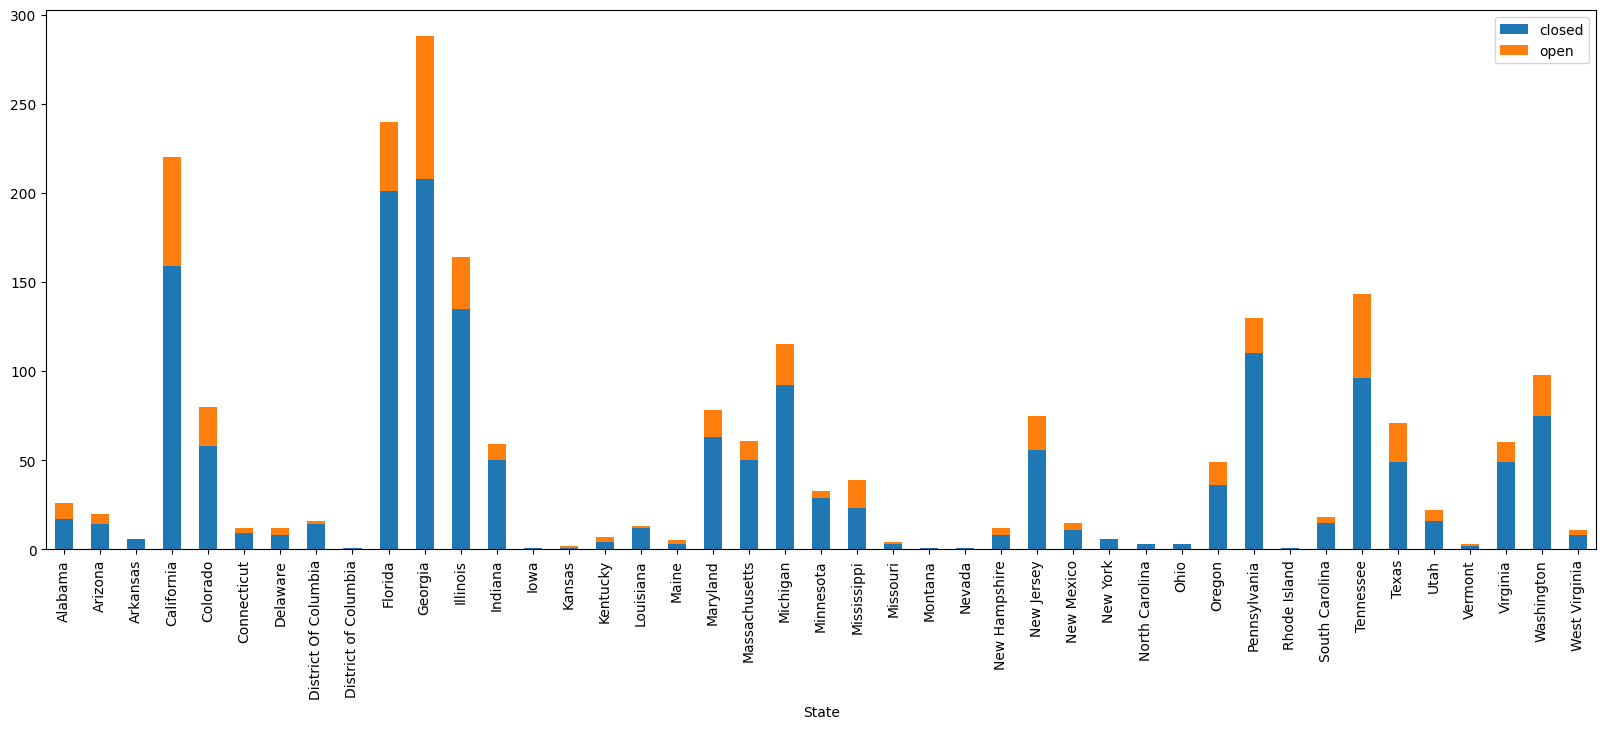

In [8]:

# For stacked bar chart
states.columns = [b for a, b in states.columns]
states.columns
states.plot(kind = "bar" , stacked = True , figsize = (20,7))

In [9]:

# Which state has the maximum complaints
file.groupby("State")['Customer Complaint'].agg("count").sort_values(ascending=False).head(1)

State
Georgia    288
Name: Customer Complaint, dtype: int64

In [10]:

# Which state has the highest percentage of unresolved complaints
State_Unsolved=file.loc[file['Status']=='Open',['State']].value_counts()
State_Unsolved.head(1)/State_Unsolved.sum()*100

State     
California    12.947658
dtype: float64

In [12]:

# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls
file[file['Status']=='Closed'].groupby('Status')['Received Via'].value_counts(normalize=True)*100

Status  Received Via      
Closed  Customer Care Call    52.724796
        Internet              47.275204
Name: Received Via, dtype: float64

In [14]:
file

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,Day,new_column
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,closed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,closed
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,closed
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,open
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No,2,4,closed
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,2,6,closed
2221,331188,complaint about comcast,06-09-15,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No,9,6,closed
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No,6,23,closed
